In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime
from matplotlib.gridspec import GridSpec
import calendar


In [2]:
# Loading the file 
X = np.load('../raw_data/X_train_copernicus.npz', allow_pickle=True)
X.files

['datetime', 'GHI', 'CLS', 'SZA', 'SAA']

In [3]:
# Access the contents of the .npz file
date = X['datetime']
GHI = X['GHI']
CLS = X['CLS']
SZA = X['SZA']
SAA = X['SAA']

In [5]:
print(f'Solar zenith angle has this shape {SZA.shape}')
print(f'Solar azimuth angle (SAA) has this shape {SAA.shape}')

Solar zenith angle has this shape (1845, 8, 81, 81)
Solar azimuth angle (SAA) has this shape (1845, 8, 81, 81)


In [145]:
print(f'This is the shape of date feature {date.shape[0]}')



This is the shape of date feature 1845


In [9]:
print(f'SZA observations have this shape {SZA[0,0].shape}')
print(f'SAA observations have this shape {SAA[0,0].shape}')

SZA observations have this shape (81, 81)
SAA observations have this shape (81, 81)


In [146]:
print(date[0])


2012-01-01 09:15:00


# **** SAA *****

In [147]:
# def the num of obs we've in a day 
def n_obs_in_day(observation = 96):
    date[observation]
    number_obs_day = 0
    for i in range(8):
        if date[observation+i].day == date[observation].day:
            number_obs_day += 1
    return number_obs_day

n_obs_in_day()

4

In [139]:
def min_max(feature = SAA,
            observation = 96):
    
    b_total=[]
    min_max = []
    for z in range(6):
        b_outer = []
        for y in range(8):
            b_inner=[]
            for x in feature[observation+z,y,:,:]:
                b_inner.append(np.max(x))
            b_outer.append(b_inner)
        b_total.append(b_outer)

    vmax=np.max(b_total)  
    #print(vmax)
    vmin=np.min(b_total)  
    min_max.append(vmin)
    min_max.append(vmax)
    return min_max
    
    #print(vmin)

In [133]:
def day_information(
    feature = SAA,
    observation = 96, 
    timestamp = 0
    ):
    
    # Print total radiation for all pixels in a timestamp
    #print(f'The radiation on {date[observation]} was {feature[observation, timestamp, :, :].sum()}.')
    #print(f'The radiation on {date[observation]} looks like:')

   
    time = datetime.datetime(year = date[observation].year,
                             month=date[observation].month, 
                             day = date[observation].day,
                             hour=date[observation].hour, 
                             minute=date[observation].minute)
    
    delta=datetime.timedelta(minutes=15)
    time = time - datetime.timedelta(minutes=60)
    
    # we're setting the num of obs in day
    observation_max = n_obs_in_day(observation)
    # Define number of rows and columns you want in your figure
    nrow = observation_max
    ncol = 8
    
    fig = plt.figure(figsize = (100,60))
    
    gs = GridSpec(nrow, ncol + 1, figure=fig)
    # Fill your figure with desired plots
    axes = []   
    for j in range(observation_max):
        for i in range(8):
            time=time+delta
            #plt.subplot(6, 8, j * 8 + i + 1)
            axes.append(fig.add_subplot(gs[j, i]))
            
            plt.title(time.time(), fontsize=80)
            plt.xticks(fontsize=35)
            plt.yticks(fontsize=35)
            
            im = axes[-1].imshow(feature[observation+j,i,:,:], 
                       cmap='jet', norm='linear', vmin = min_max(feature)[0],vmax= min_max(feature)[1])
    
    month = date[observation].month
    fig.suptitle(f'Solar Azimuth Angle on {date[observation].day} of {calendar.month_name[month]}', 
                 fontsize=110)
    
    # Shared colorbar method 1
    ax9 = fig.add_subplot(gs[:, 8])
    axes.append(ax9)
    cbar = fig.colorbar(im, cax=axes[-1],)
    tick_font_size = 90
    cbar.ax.tick_params(labelsize=tick_font_size)
    # we should use a variable to describe the feature
    # got an error when tried 
    cbar.ax.set_title(f'SAA Range',fontsize=80)

                        

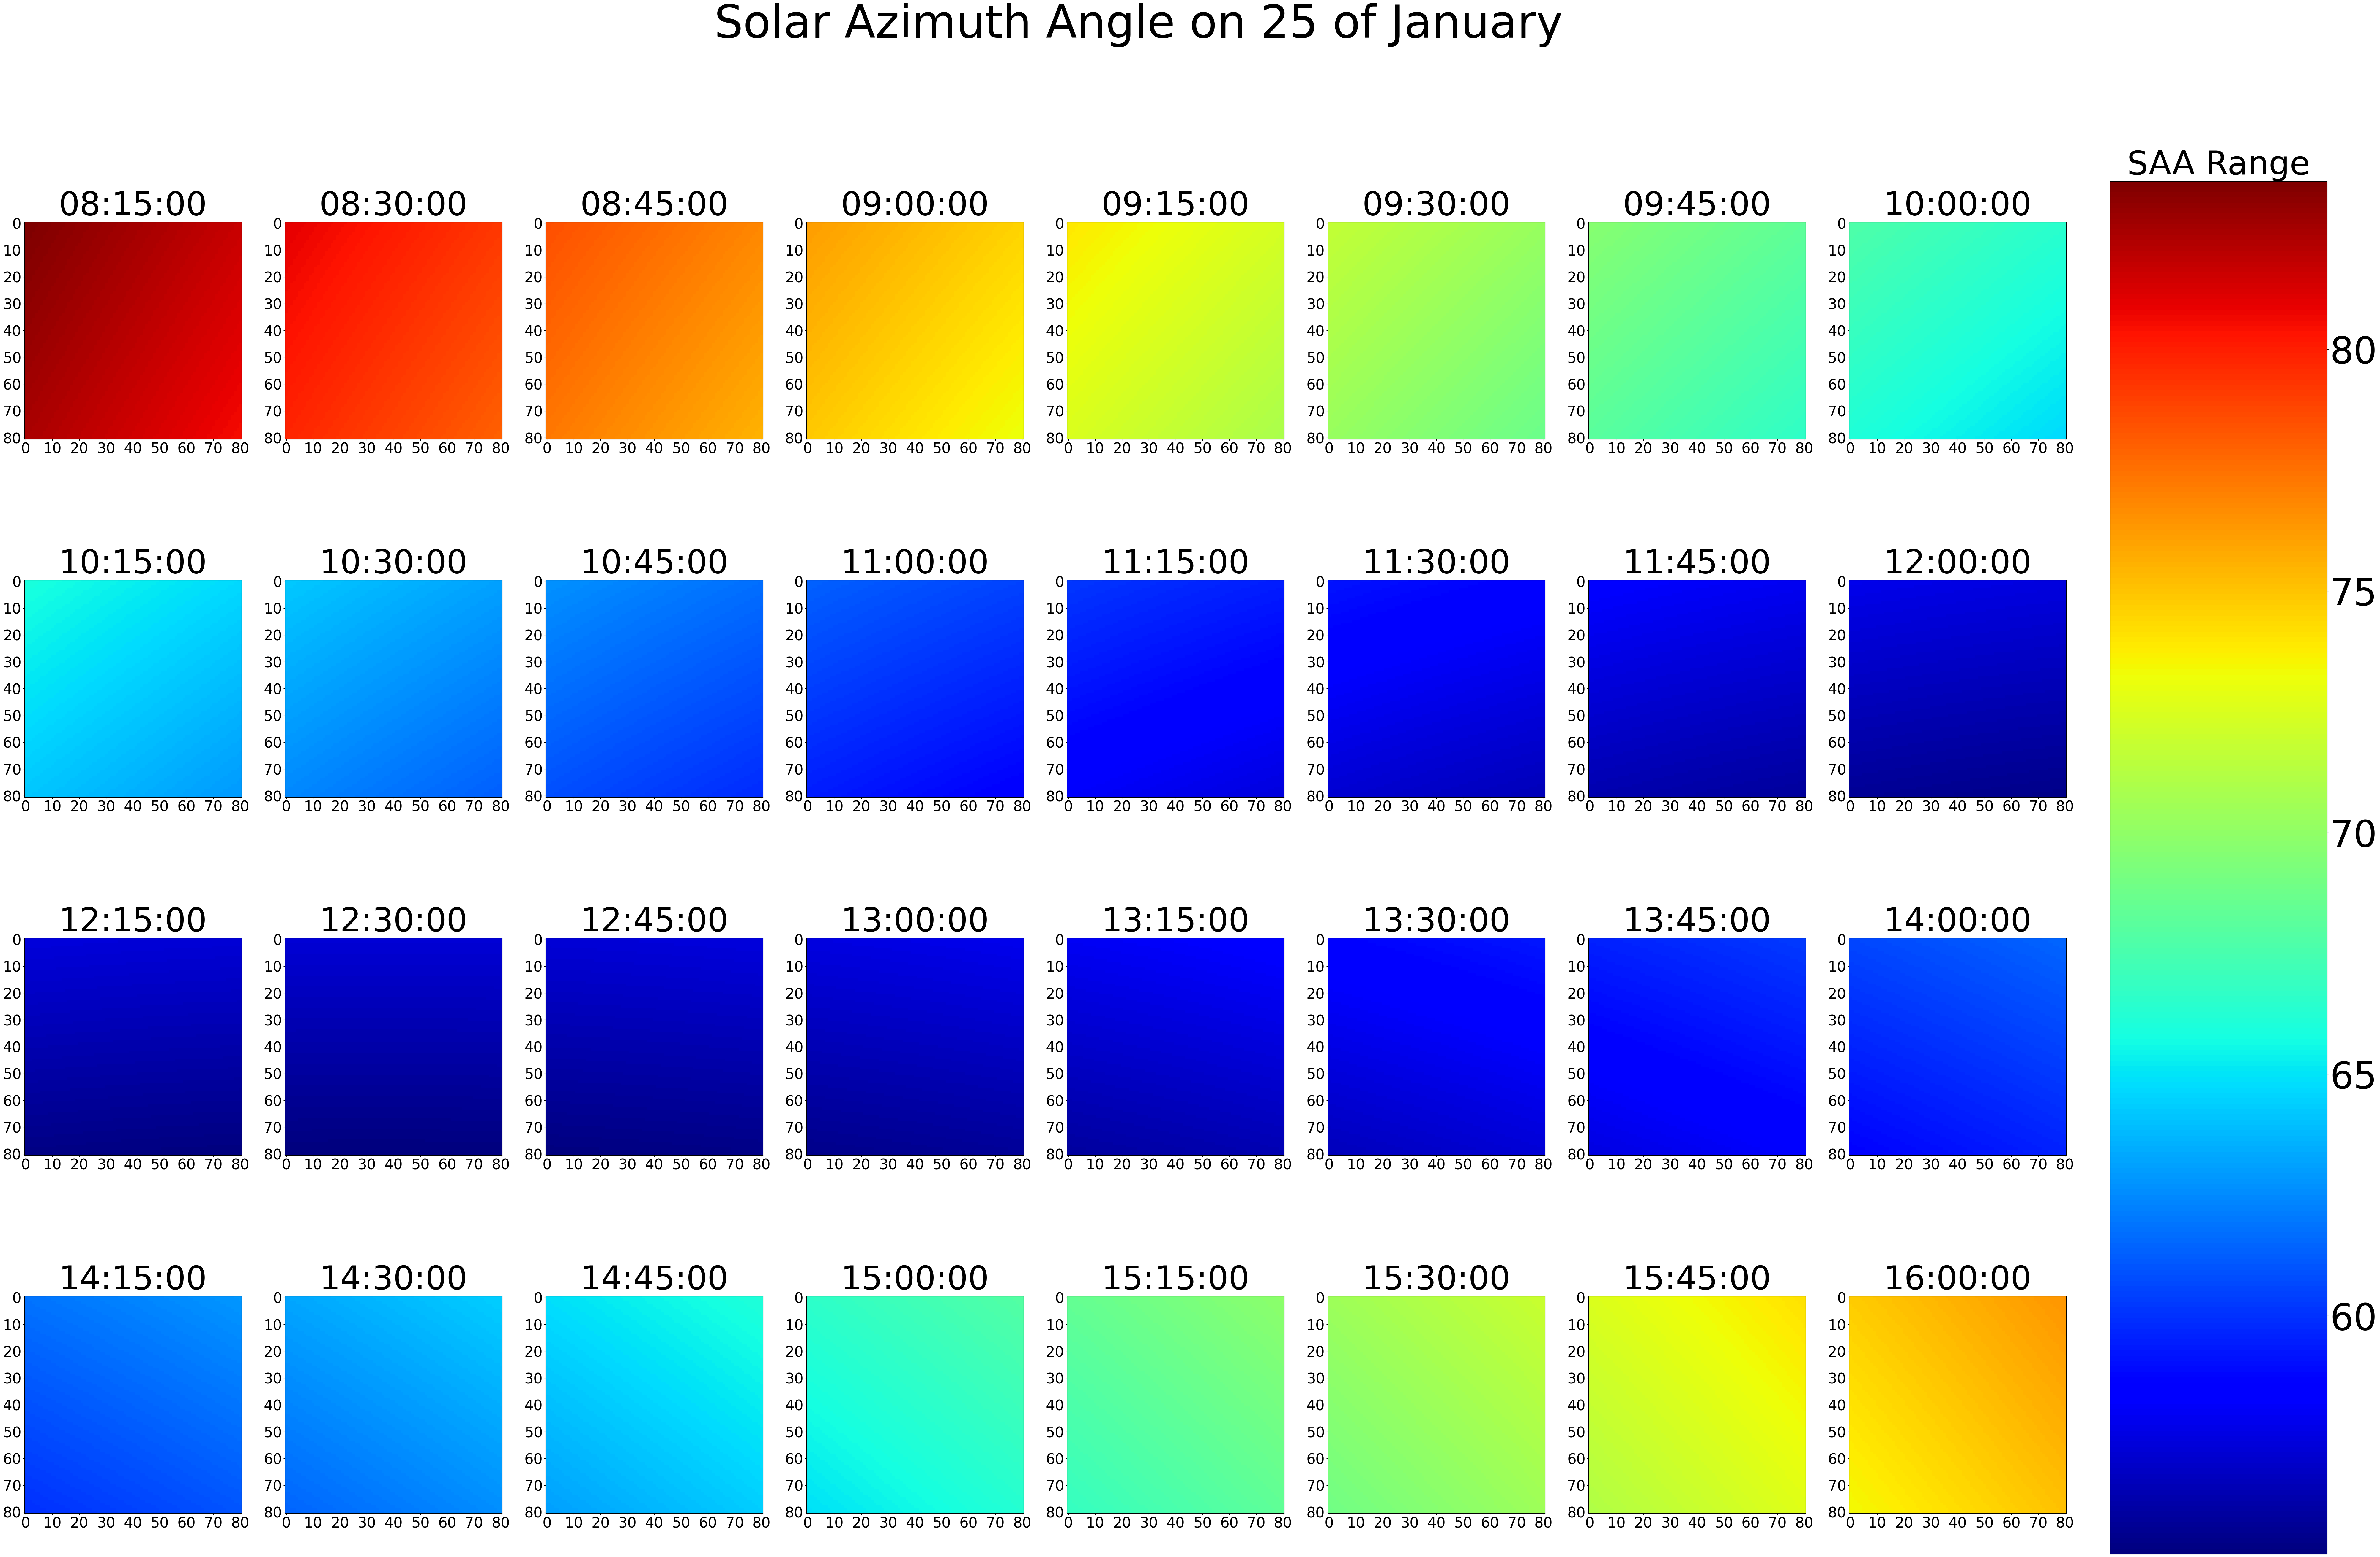

In [134]:
day_information()

In [8]:
def SAA_polar_plot(
    feature = SAA,
    observation = 96):
    # defining new arrays 
    array_day = []
    time_day = []
    # we're setting the num of obs in day
    observation_max = n_obs_in_day(observation)
    # defining month name
    month = date[observation].month
    # time interval
    time = datetime.datetime(year=date[observation].year,
                             month=date[observation].month,
                             day=date[observation].day,
                             hour=date[observation].hour, 
                             minute=date[observation].minute)
    
    delta = datetime.timedelta(minutes=15)
    time = time - datetime.timedelta(minutes=60)
    
    for j in range(observation_max):
        for i in range(8):
            time = time+delta
            time_day.append(time)
            array_day.append(np.mean(feature[observation+j,i,:,:]))

    array_day = np.array(array_day)

    ax = plt.subplot(111, projection='polar')
    ax.plot(array_day*np.pi/180, time_day, color='black', marker='D', markerfacecolor='limegreen')
    ax.set_theta_zero_location('N')
    ax.set_theta_direction(-1) # clockwise
    ax.grid(True)

    #ax.set_ylabel('Time', color='crimson')
    ax.tick_params(axis='y', colors='crimson')
    ax.set(xlabel='SAA', ylabel='Time',
       title=f'Solar Azimuth Angle on {date[observation].day} of {calendar.month_name[month]}')

    plt.show()


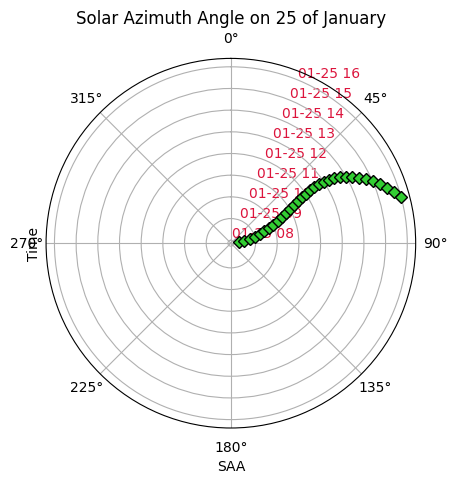

In [11]:
SAA_polar_plot()

In [757]:
four_season_days = [96, 536, 1082, 1573]
four_season_days[1]

536

In [67]:
# defining time variable 
def time(observation= 96):
   
    time = datetime.datetime(year=date[observation].year,
                                month=date[observation].month,
                                day=date[observation].day,
                                hour=date[observation].hour, 
                                minute=date[observation].minute)
    return time

time()

datetime.datetime(2012, 1, 25, 9, 0)

In [103]:
# I want to create 2 arr (arr_total and time_total) for "four_season_days" obsevartions
# So I can build a ploar plot for all the days 
# below - time_total is not working well, but the shape right

feature = SAA
four_season_days = [96, 536, 1082, 1573]

observation_max_arr = []
arr_total = []
time_total = []
time_list = []
time_list_timestamp = []

for obs in four_season_days:
    time_list.append(time(observation = obs))

# setting the timestamp
delta = datetime.timedelta(minutes=15)

for obs in range(len(four_season_days)):
    # we're setting the num of obs in each day
    observation_max_arr.append(n_obs_in_day(four_season_days[obs]))
    for k in observation_max_arr:
        
        arr_inner = []
        time_inner = []
        for j in range(k):
            
            for i in range(8):
                    
                    _time_list = time_list[obs] - datetime.timedelta(minutes=60)
                    _time_list = _time_list + delta 
                    time_inner.append(_time_list)
                    

                    arr_inner.append(np.mean(feature[four_season_days[obs]+j,i,:,:]))
                   

    arr_total.append(arr_inner)
    time_total.append(time_inner)

In [105]:
# checking above results 
print(np.shape(time_total[0]))
time_total

(32,)


[[datetime.datetime(2012, 1, 25, 8, 15),
  datetime.datetime(2012, 1, 25, 8, 15),
  datetime.datetime(2012, 1, 25, 8, 15),
  datetime.datetime(2012, 1, 25, 8, 15),
  datetime.datetime(2012, 1, 25, 8, 15),
  datetime.datetime(2012, 1, 25, 8, 15),
  datetime.datetime(2012, 1, 25, 8, 15),
  datetime.datetime(2012, 1, 25, 8, 15),
  datetime.datetime(2012, 1, 25, 8, 15),
  datetime.datetime(2012, 1, 25, 8, 15),
  datetime.datetime(2012, 1, 25, 8, 15),
  datetime.datetime(2012, 1, 25, 8, 15),
  datetime.datetime(2012, 1, 25, 8, 15),
  datetime.datetime(2012, 1, 25, 8, 15),
  datetime.datetime(2012, 1, 25, 8, 15),
  datetime.datetime(2012, 1, 25, 8, 15),
  datetime.datetime(2012, 1, 25, 8, 15),
  datetime.datetime(2012, 1, 25, 8, 15),
  datetime.datetime(2012, 1, 25, 8, 15),
  datetime.datetime(2012, 1, 25, 8, 15),
  datetime.datetime(2012, 1, 25, 8, 15),
  datetime.datetime(2012, 1, 25, 8, 15),
  datetime.datetime(2012, 1, 25, 8, 15),
  datetime.datetime(2012, 1, 25, 8, 15),
  datetime.datet

### My understading - solar azimuth angle (SAA) - 
### we know and observe the follwing:
### > at the sun rise the angle is 90º (east) and the lines we see are verticals
### > towards the midday the angle is 0º (last and fist plots from 2nd and 3rd rows)
### > so the lines are horizontals. 
### > at sunset, the angle we see should be 270º (west) - last row
### > the movement should be clockwise, I think, it's 

## **** SZA *****

In [140]:
min_max(feature = SZA, observation = 96)

[121.86, 232.4]

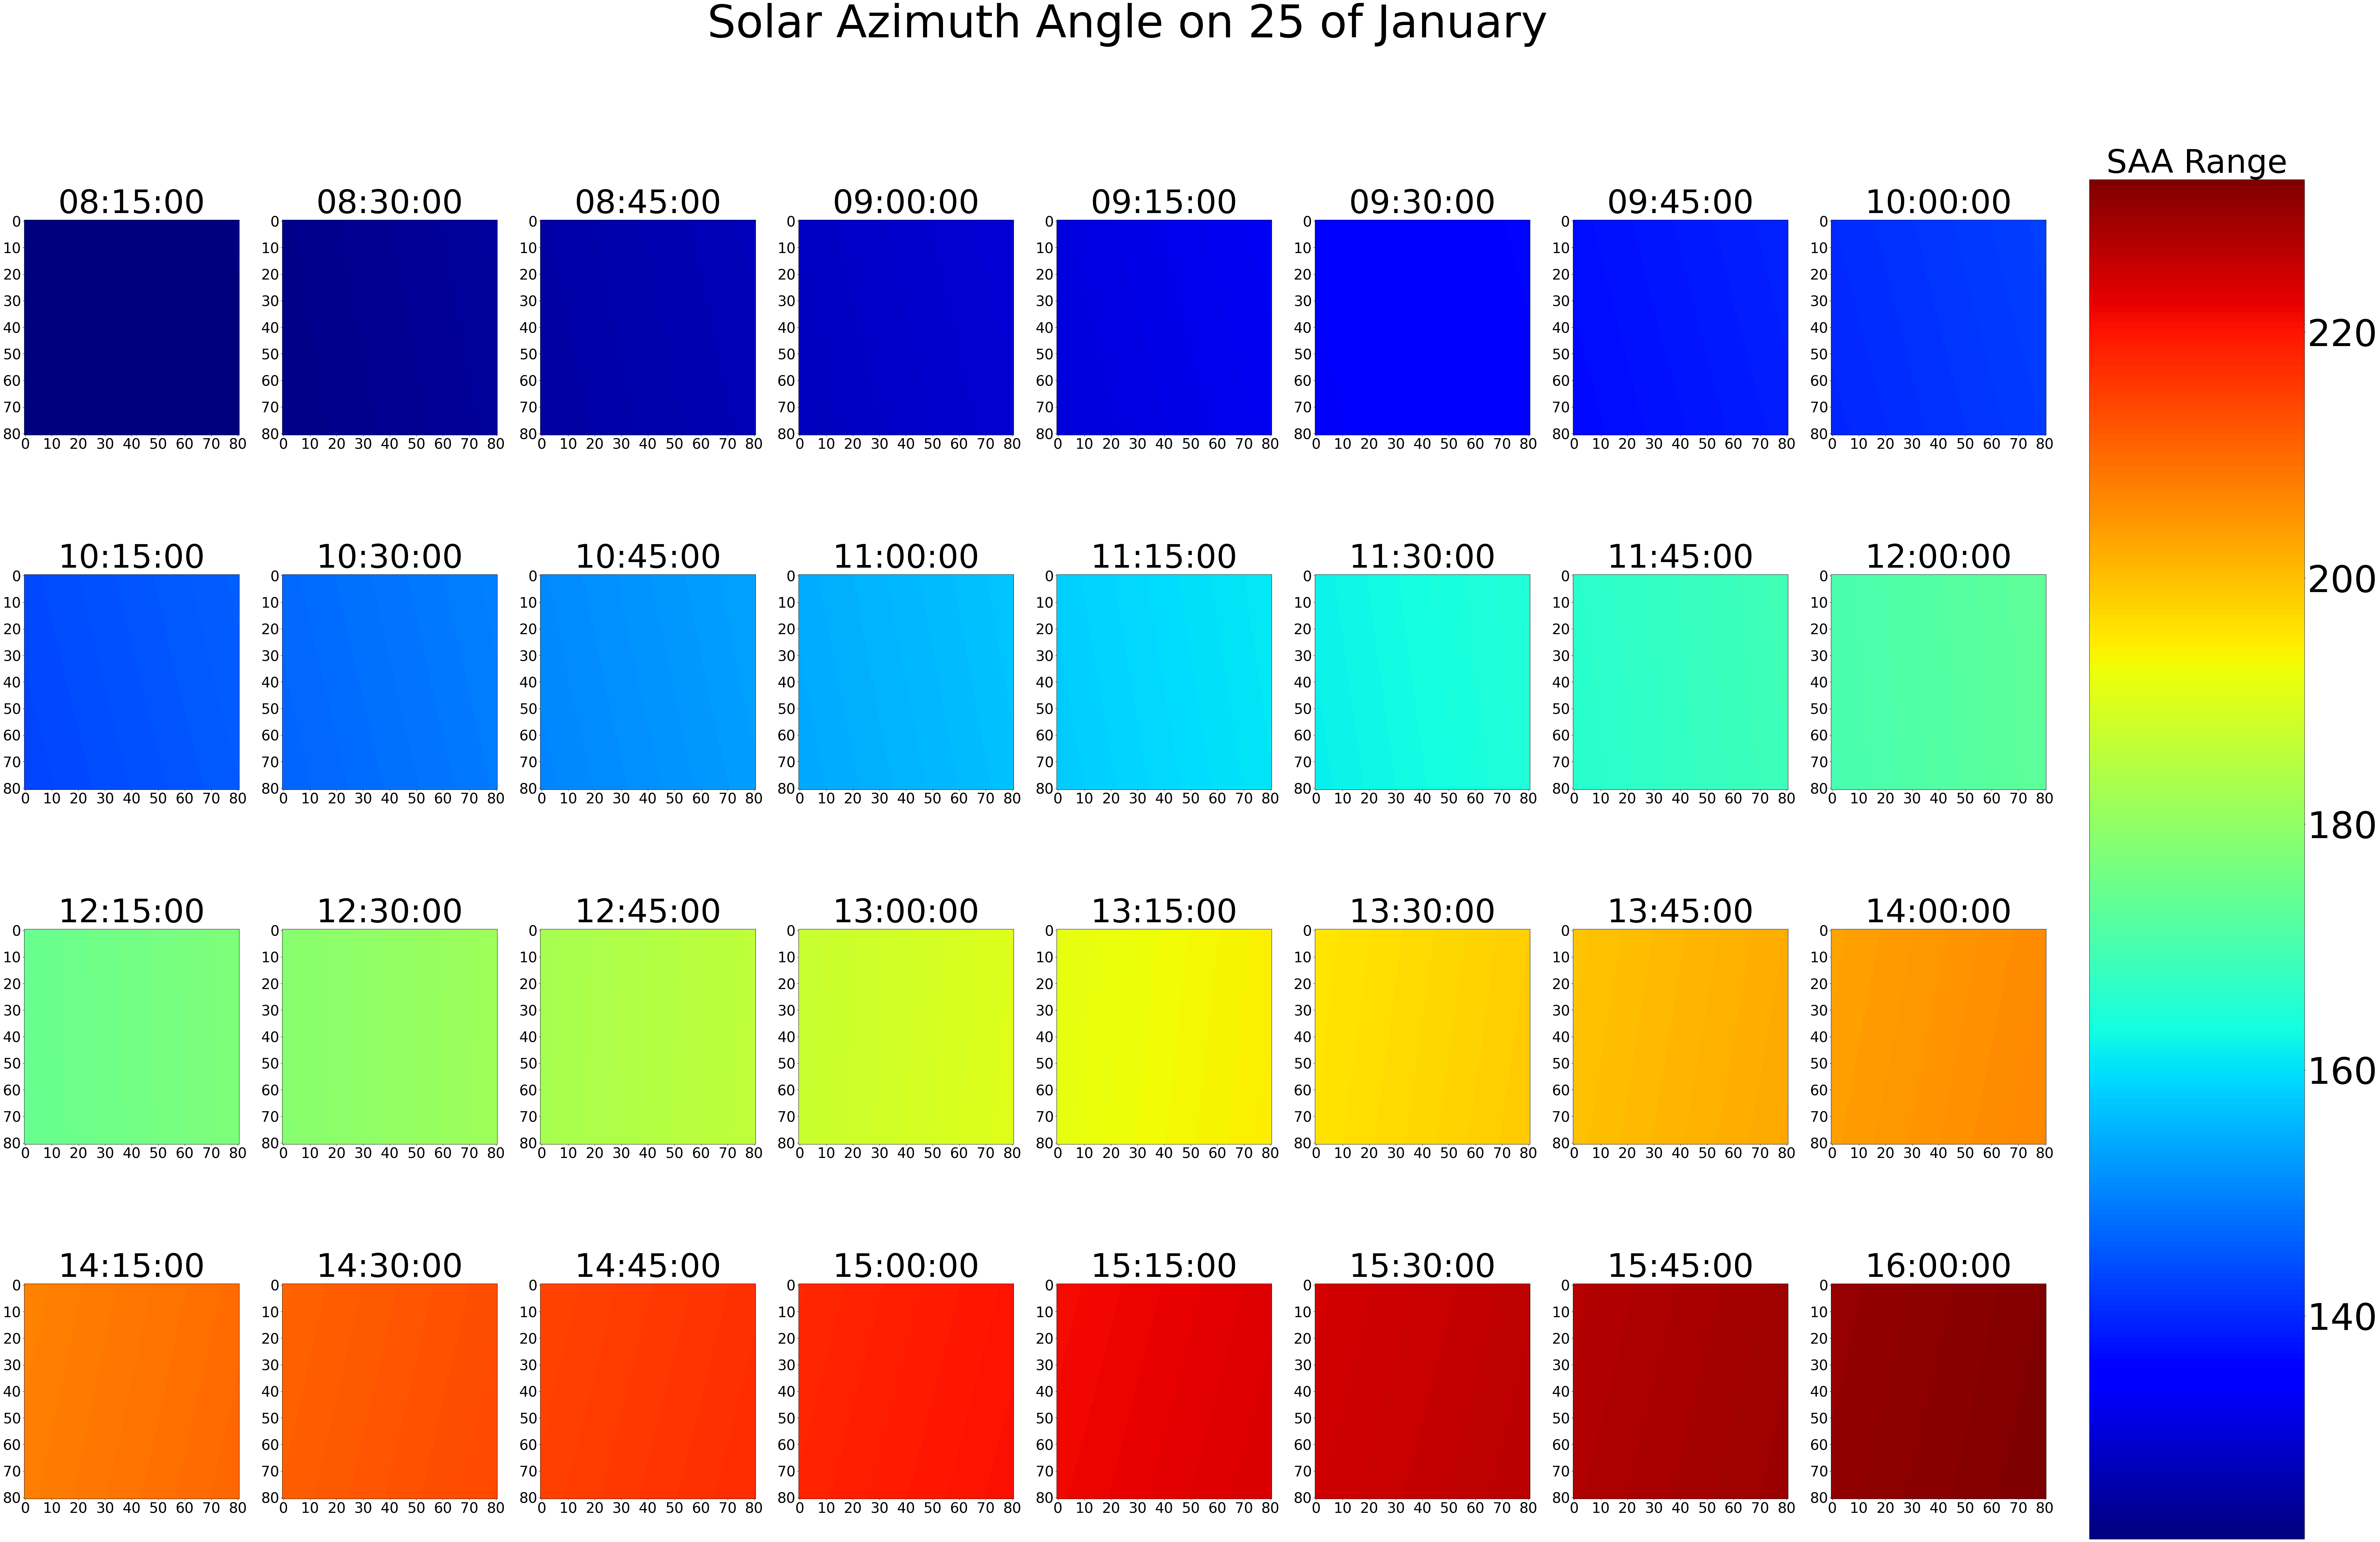

In [141]:
day_information(feature = SZA, observation = 96)

In [143]:
min_max(feature = SZA, observation = 1016)

[69.89, 283.41]

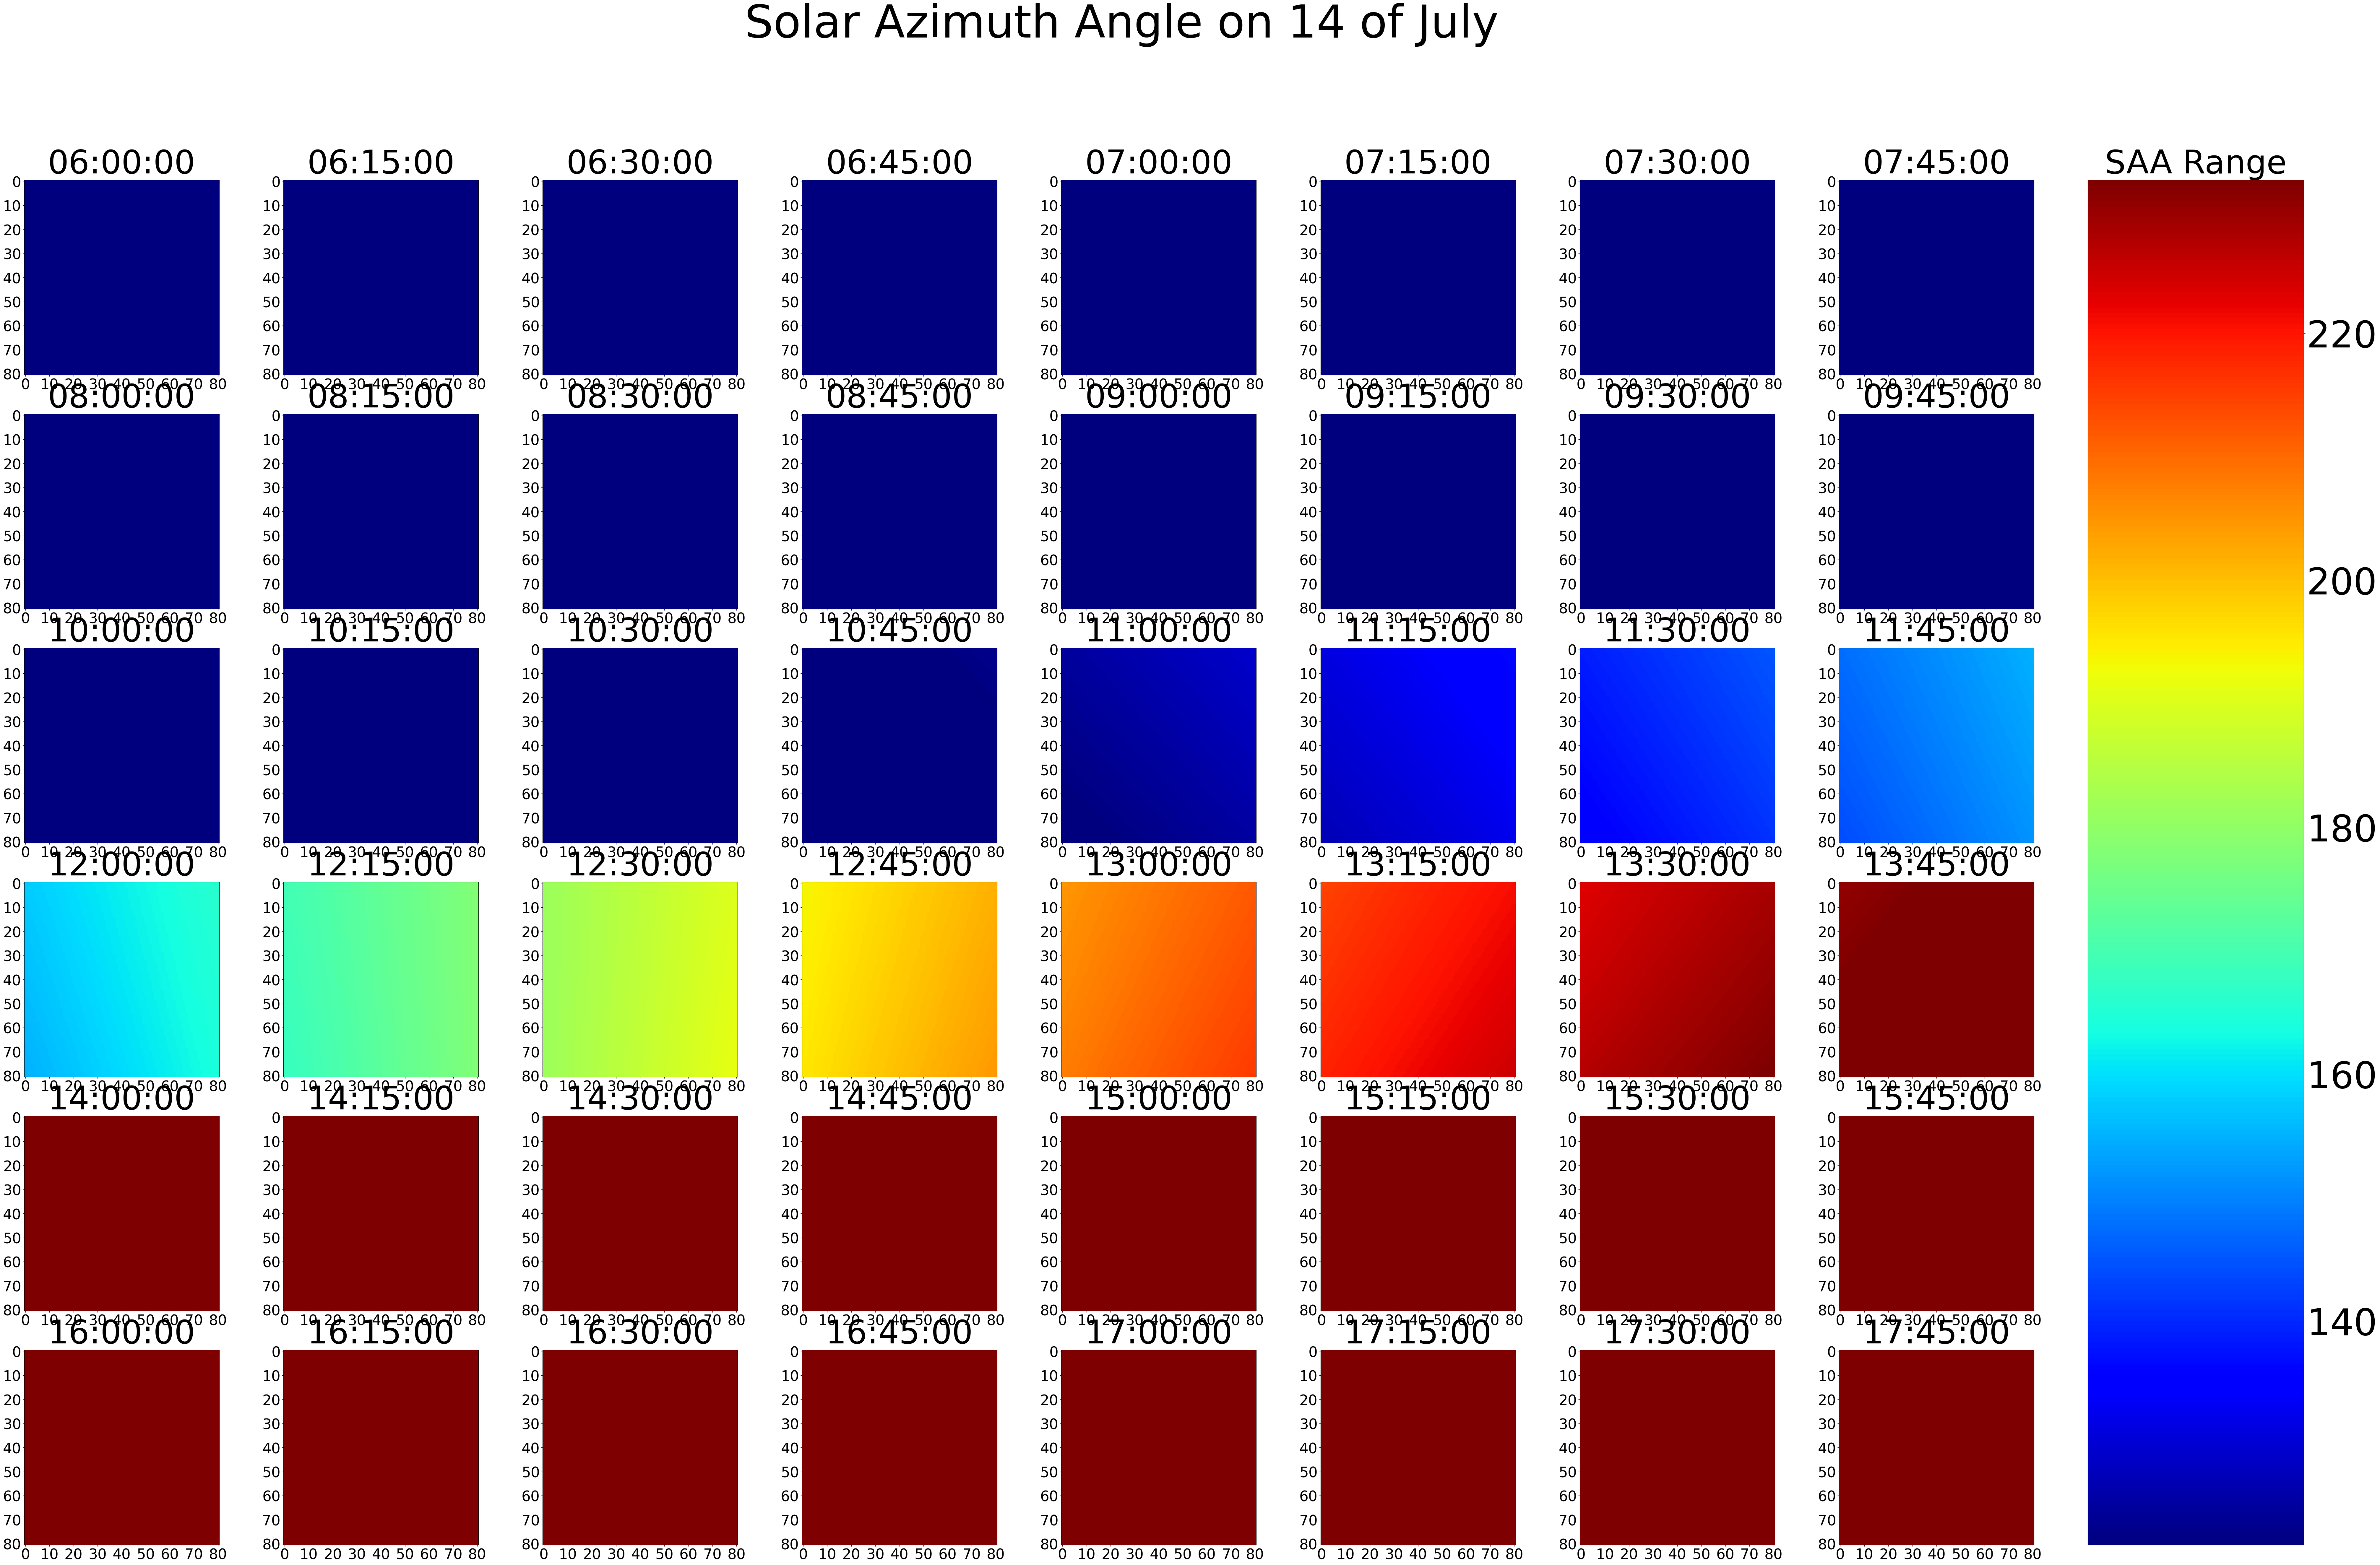

In [144]:
day_information(feature = SZA, observation = 1016)

### My understading - solar azimuth angle (SZA) - 
### we know and observe the follwing:
### > angle between the sun and the line (vertical) of sight of the sun

In [31]:
print(datetime[1016])
print(SZA[1016,0,:,:])


2012-07-14 06:45:00
[[68.68 68.7  68.72 ... 70.2  70.21 70.23]
 [68.68 68.7  68.72 ... 70.19 70.21 70.23]
 [68.67 68.69 68.71 ... 70.19 70.21 70.23]
 ...
 [68.42 68.44 68.46 ... 69.86 69.88 69.9 ]
 [68.42 68.44 68.46 ... 69.86 69.88 69.9 ]
 [68.42 68.43 68.45 ... 69.86 69.87 69.89]]


In [49]:

print(datetime[95])
print(SZA[95,0,:,:])
print("we've representation of angles\nas solar zenith angle is the angle between the sun and the vertical\n1st matrix is at 11am and the 2nd from 15pm where we're closer to the sunset")      

2012-01-24 15:00:00
[[207.03 207.06 207.09 ... 209.6  209.63 209.67]
 [207.03 207.07 207.1  ... 209.61 209.64 209.67]
 [207.04 207.07 207.11 ... 209.61 209.65 209.68]
 ...
 [207.56 207.59 207.62 ... 210.15 210.19 210.22]
 [207.56 207.6  207.63 ... 210.16 210.19 210.23]
 [207.57 207.6  207.64 ... 210.17 210.2  210.23]]
we've representation of angles
as solar zenith angle is the angle between the sun and the vertical
1st matrix is at 11am and the 2nd from 15pm where we're closer to the sunset


In [57]:
print(datetime[500])
print(SZA[500,0,:,:])
print("ok, the vertical and horizontal line east where sunrise is 90º\nwe're close to that")

2012-04-19 07:15:00
[[82.34 82.36 82.38 ... 83.93 83.95 83.97]
 [82.34 82.36 82.38 ... 83.92 83.94 83.96]
 [82.33 82.35 82.37 ... 83.92 83.94 83.96]
 ...
 [82.03 82.05 82.07 ... 83.54 83.56 83.58]
 [82.03 82.05 82.06 ... 83.53 83.55 83.57]
 [82.02 82.04 82.06 ... 83.53 83.55 83.57]]
ok, the vertical and horizontal line east where sunrise is 90º
we're close to that


## **** Conclusion *****
### I believe all the values represent angles
### 
### 